In [1]:
from skimage import data, color
import matplotlib.pyplot as plt
import numpy as np

# this image is a rgb image
rocket_image = data.rocket()

In [2]:
# We can se the difference between rgb and grayscale images
rocket_image.shape

(427, 640, 3)

In [3]:
gray_rocket = color.rgb2gray(rocket_image)
gray_rocket.shape

(427, 640)

In [4]:
gray_rocket.size

273280

In [5]:
# this function to display the images using matplotlib
def show_image(image, title='Image', camp_type='gray'):
    plt.imshow(image, cmap=camp_type)
    plt.title(title)
    plt.axis('off')
#     plt.show()

In [6]:
# import new two images
coffee_image = data.coffee()
coins_image = data.coins()

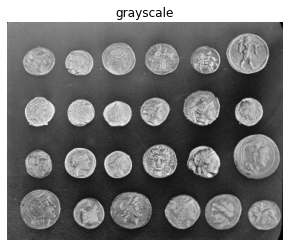

In [7]:
show_image(coffee_image, 'rgb')
show_image(coins_image, 'grayscale')

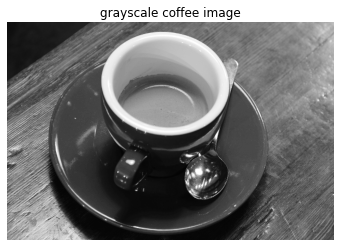

In [8]:
# lets convert the coffe image to grayscale
coffee_image_gray = color.rgb2gray(coffee_image)
show_image(coffee_image_gray, 'grayscale coffee image')

In [9]:
# lets import new image and split it to three different channels
shapes_img = plt.imread('images\\shapes52.jpg')

In [10]:
#  We can slice the multidimensional array and obtain these channels separately. 
red = shapes_img[:, :, 0]
green = shapes_img[:, :, 1]
blue = shapes_img[:, :, 2]

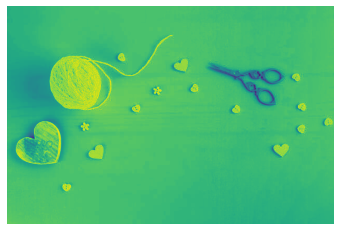

In [11]:
plt.imshow(red)
plt.axis('off')
plt.show()

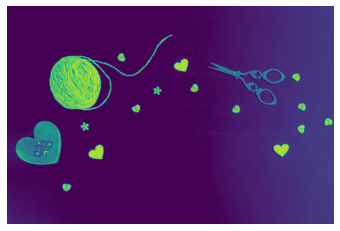

In [12]:
plt.imshow(green)
plt.axis('off')
plt.show()

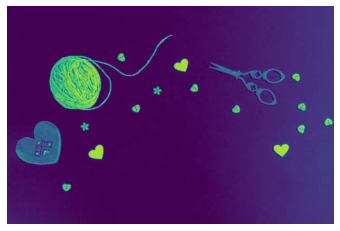

In [13]:
plt.imshow(blue)
plt.axis('off')
plt.show()

In [14]:
# Flip an image
girl = plt.imread('images\\4.1.01.tiff')

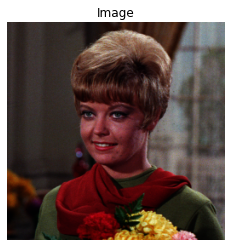

In [15]:
show_image(girl)

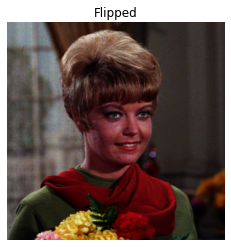

In [16]:
# Flip the image horizontally
flipped_girl_horizontally = np.fliplr(girl)
show_image(flipped_girl_horizontally, 'Flipped')

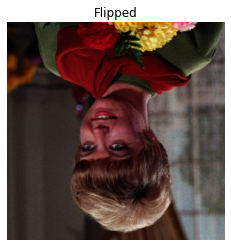

In [17]:
# Flip the image vertically.

flipped_girl_up = np.flipud(girl)
show_image(flipped_girl_up, 'Flipped')

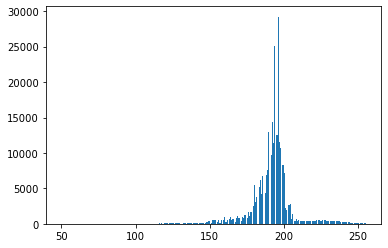

In [18]:
# how to show histogram to show the density of a pixels in an image
# this image  
red_girl = girl[:, :, 0]
#  Use ravel to return a continuous flattened array from the color values of the image
plt.hist(red.ravel(), bins=256)
plt.show()

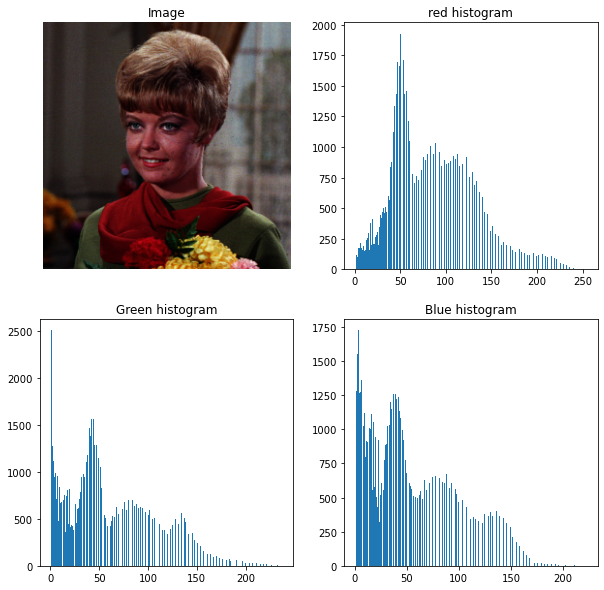

In [19]:
# the following image tends to be dark in its three channels
fig = plt.figure(figsize=(10, 10))

image = fig.add_subplot(2, 2, 1)
plt.imshow(girl)
plt.title('Image')
plt.axis('off')

red_hist = fig.add_subplot(2, 2, 2)
plt.hist(girl[:, :, 0].ravel(), bins=256)
plt.title('red histogram')

blue_hist = fig.add_subplot(2, 2, 3)
plt.hist(girl[:, :, 1].ravel(), bins=256)
plt.title('Green histogram')

green_hist = fig.add_subplot(2, 2, 4)
plt.hist(girl[:, :, 2].ravel(), bins=256)
plt.title('Blue histogram')
plt.show()

### Thresholding
With scikit-image

In [20]:
# """
#     Thresholding is used to partition the background and foreground of grayscale images, 
#     by essentially making them black and white.
#     We compare each pixel to a given threshold value. 
#     If the pixel is less than that value, we turn it white. 
#     If it's greater;  we turn it black.
#     Thresholding is the simplest method of image segmentation.
#     Thresholding let us isolate elements and is used in object detection, 
#     facial recognition, and other applications.
# """

In [21]:
from skimage.filters import try_all_threshold

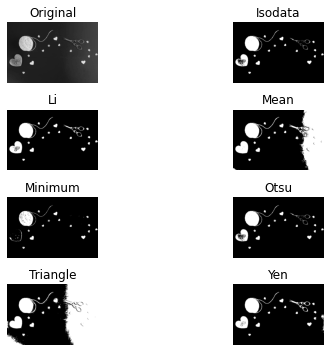

In [22]:
# apply all thresholds
# first convert the image to grayscale
shapes_img_gray = color.rgb2gray(shapes_img)
fig, ax  = try_all_threshold(shapes_img_gray, verbose=False)

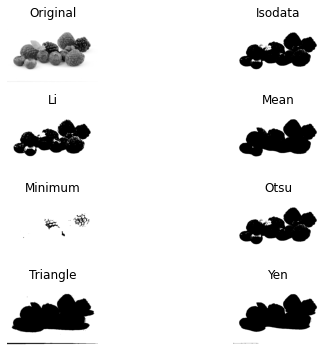

In [23]:
fruits_image = plt.imread('images\\fruits.jpg')

# Turn the fruits_image to grayscale
grayscale = color.rgb2gray(fruits_image)

# Use the try all method on the resulting grayscale image
fig, ax = try_all_threshold(grayscale, verbose=False)

# Show the resulting plots
plt.show()

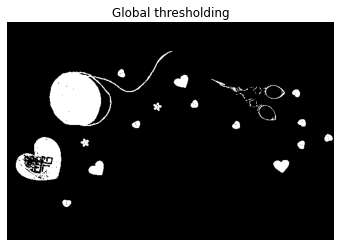

In [24]:
# When the background of an image seems uniform, global thresholding works best
from skimage.filters import threshold_otsu

# Obtain the optimal threshold value
thresh = threshold_otsu(shapes_img_gray)

# Apply thresholding to the image
binary = shapes_img_gray > thresh

show_image(shapes_img_gray, 'Original')
show_image(binary, 'Global thresholding')

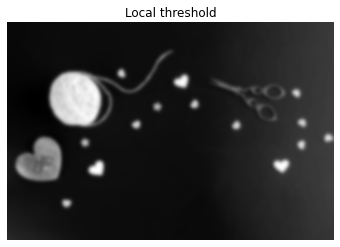

In [25]:
# this time try local thresholding 
from skimage.filters import threshold_local

# With this function, we calculate thresholds in small pixel regions surrounding each pixel we are binarizing. 
block_size = 21  # the block size is 35 pixels

thresh = threshold_local(shapes_img_gray, block_size, offset=10)
show_image(thresh, 'Local threshold')

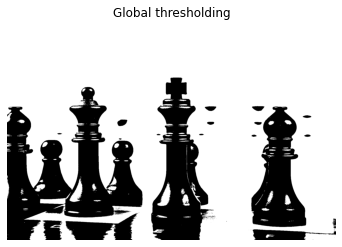

In [26]:
bw_page_original = plt.imread('images\\bw.jpg')
# convert to gray scale
bw_page_original = color.rgb2gray(bw_page_original)

# Obtain the optimal otsu global thresh value
global_thresh = threshold_otsu(bw_page_original)

# Obtain the binary image by applying global thresholding
binary_global = bw_page_original > global_thresh

# Show the binary image obtained
fig = plt.figure()
show_image(binary_global, 'Global thresholding')

--------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------

### Filters

In [27]:
"""
    Filtering is a technique for modifying or enhancing an image. 
    In essence, a filter is a mathematical function that is applied to images. 
    It can be used to emphasize or remove certain features, like edges. Smoothing, sharpening and edge detection.
    Filtering is a neighborhood operation.
    With filtering we can detect edges, so we can find the boundaries of objects within images.
    most of the shape information is enclosed in edges.
"""


'\n    Filtering is a technique for modifying or enhancing an image. \n    In essence, a filter is a mathematical function that is applied to images. \n    It can be used to emphasize or remove certain features, like edges. Smoothing, sharpening and edge detection.\n    Filtering is a neighborhood operation.\n    With filtering we can detect edges, so we can find the boundaries of objects within images.\n    most of the shape information is enclosed in edges.\n'

##### Edge detection 
works by detecting discontinuities in brightness.<br>
A common edge detection algorithm is **Sobel**.

In [28]:
def plot_comparison(original, filtered, title_filtered):
    fig = plt.figure(figsize=(8, 10))
    sub1 = fig.add_subplot(1, 2, 1)
    sub1.imshow(original)
    plt.title('Original')
    plt.axis('off')
    
    sub2 = fig.add_subplot(1, 2, 2)
    sub2.imshow(filtered)
    plt.title(title_filtered)
    plt.axis('off')
    
    
# def plot_comparison(original, filtered, title_filtered):
#     fig = plt.figure(figsize=(8, 10))
#     fig.add_subplot(1, 2, 1)
#     show_image(original, 'Original')
#     plt.axis('off')
    
#     fig.add_subplot(1, 2, 2)
#     show_image(filtered, title_filtered)
#     plt.axis('off')

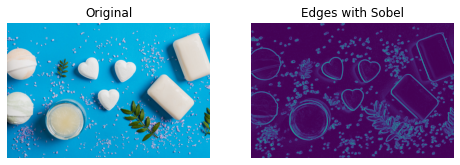

In [29]:
from skimage.filters import sobel

soap_image = plt.imread('images\\soap_image.jpg')

# Make the image grayscale
soaps_image_gray = color.rgb2gray(soap_image)

# Apply edge detection filter
edge_sobel = sobel(soaps_image_gray)
                                                           
# Show original and resulting image to compare
# show_image(soap_image, "Original")
# show_image(edge_sobel, "Edges with Sobel")
plot_comparison(soap_image, edge_sobel, "Edges with Sobel")

##### Smoothing
Using **Gaussian filter**
,uded to blur an image or reduce noise and contrast.

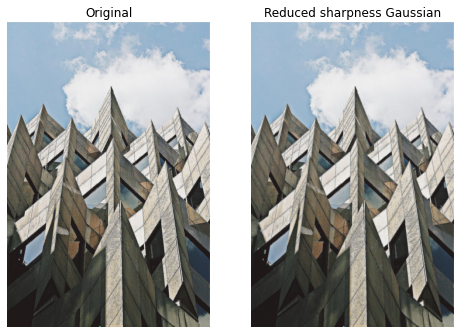

In [30]:
from skimage.filters import gaussian

building_image = plt.imread('images\\building_image.jpg')

# the original image is passed as first parameter to the Gaussian function and the multichannel 
# boolean parameter is set to True if the image is colored

# Apply filter
gaussian_image = gaussian(building_image, multichannel=True)

# Show original and resulting image to compare
# show_image(building_image, "Original")
# show_image(gaussian_image, "Reduced sharpness Gaussian")
plot_comparison(building_image, gaussian_image, "Reduced sharpness Gaussian")

#### Contrast enhancement
The contrast is the difference between the maximum and minimum<br>
pixel intensity in the image. <br>
**Histogram equalization increases the contrast**

In [31]:
"""
    Image enhancement can be extremely useful in multiple areas.Often medical images like this X-ray can have low contrast, 
    making it hard to spot important details. When we improve the contrast,the details become more visible. 
    It's definitely easier to spot things on this one! 
"""

# Min pixels - Min pixels = (if the max is close to 255 and the min close to 0)
#                             we will get wide range which means that the Contrast is high

# When the contrast is very small then we have to stretch the histogram so the full range of 
# intensity values of the image is filled.

"\n    Image enhancement can be extremely useful in multiple areas.Often medical images like this X-ray can have low contrast, \n    making it hard to spot important details. When we improve the contrast,the details become more visible. \n    It's definitely easier to spot things on this one! \n"

**Histogram equalization**<br>
Using exposure module
##### Types:
1)  The standard<br>
2) The adaptive<br>
3) The limited adaptive

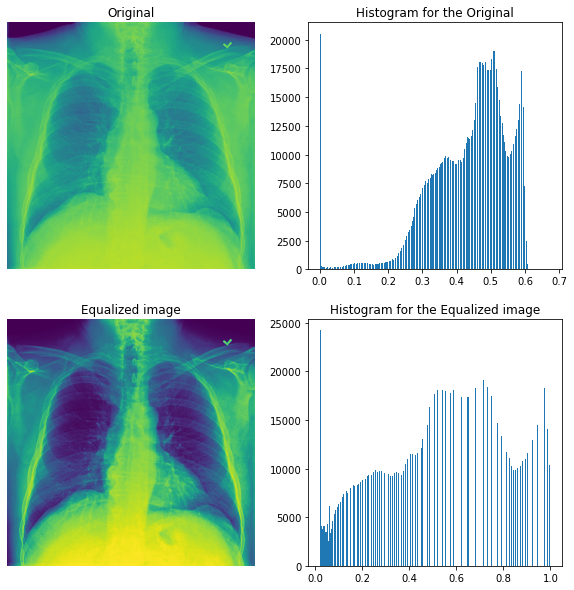

In [32]:
# 1) The standard(Its results does not look natural)
from skimage import exposure

chest_xray_image = plt.imread('images\\chest_xray_image.png')
image_eq = exposure.equalize_hist(chest_xray_image)

fig = plt.figure(figsize=(10, 10))

# Show the first figure 
sub1 = fig.add_subplot(2, 2, 1)
plt.imshow(chest_xray_image)
plt.title('Original')
plt.axis('off')

# The histogram for the first figure 
sub2 = fig.add_subplot(2, 2, 2)
plt.hist(chest_xray_image.ravel(), bins=256)
plt.title('Histogram for the Original')

# Show the second figure 
sub3 = fig.add_subplot(2, 2, 3)
plt.imshow(image_eq)
plt.title('Equalized image')
plt.axis('off')

# The histogram for the second figure 
sub4 = fig.add_subplot(2, 2, 4)
plt.hist(image_eq.ravel(), bins=256)
plt.title('Histogram for the Equalized image')
plt.show()

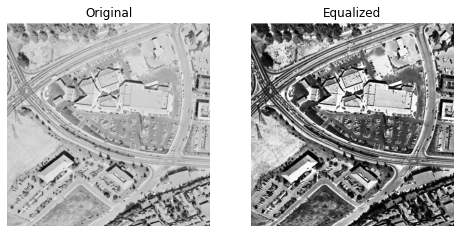

In [33]:
image_aerial = plt.imread('images\\image_aerial.tiff')
image_eq =  exposure.equalize_hist(image_aerial)

fig = plt.figure(figsize=(8, 10))
fig.add_subplot(1, 2, 1)
show_image(image_aerial, 'Original')

fig.add_subplot(1, 2, 2)
show_image(image_eq, 'Equalized')

--------------------------------------------------------------------------------------------------------------------

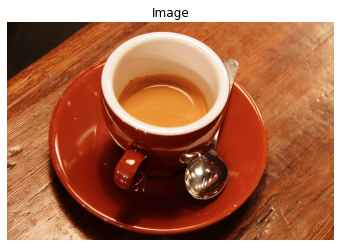

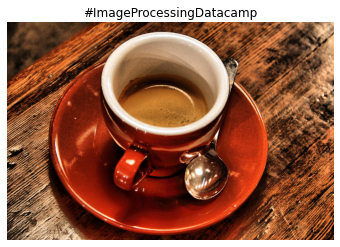

In [34]:
# 2) The adaptive()
"""
 This method computes several histograms, each corresponding to a distinct part of the image, 
 and uses them to redistribute the lightness values of the image histogram.
"""
original_image = data.coffee()

# clip_limit. This clipping limit, is normalized between 0 and 1 (higher values give more contrast).
# Apply the adaptive equalization on the original image
adapthist_eq_image = exposure.equalize_adapthist(original_image, clip_limit=0.03)

# Compare the original image to the equalized
show_image(original_image)
plt.show()
show_image(adapthist_eq_image, '#ImageProcessingDatacamp')

------------------------

#### Transformations 
Prepare images for classification machine learning models<br>
Optimiazation and compression of images<br>
Save images with same proportion before processing them further

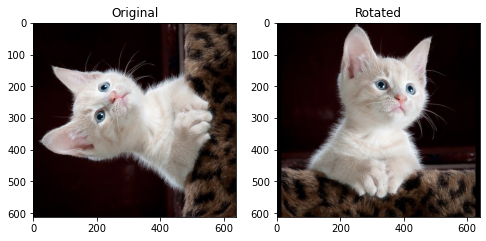

In [35]:
from skimage.transform import rotate

image_cat = plt.imread('images\\image_cat.jpg')

# Rotate the image 90 degrees clockwise
rotated_cat_image = rotate(image_cat, -90)

fig = plt.figure(figsize=(8, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(image_cat)
plt.title('Original')

fig.add_subplot(1, 2, 2)
plt.imshow(rotated_cat_image)
plt.title('Rotated')
plt.show()

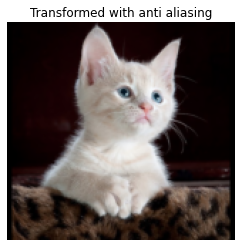

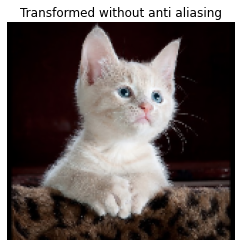

In [36]:
# Make the image 4 times smaller than the original image (set the scaling factor by 1/4)
# Setting an anti_aliasing boolean parameter to true specifies if applying a filter to smooth the image prior to down-scaling.
# Then a multichannel if the image is colored. 

from skimage.transform import rescale

# Rescale with anti aliasing
rescaled_with_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=True, multichannel=True)

# Rescale without anti aliasing
rescaled_without_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=False, multichannel=True)

# Show the resulting images
show_image(rescaled_with_aa, "Transformed with anti aliasing")
plt.show()
show_image(rescaled_without_aa, "Transformed without anti aliasing")

In [37]:
# Aliasing makes the image look like it has waves or ripples radiating from a certain portion. 

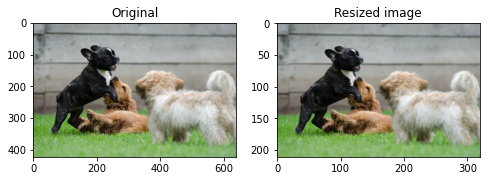

In [38]:
# Resizing -->  The same purpose as rescale, but allows to specify an output image shape instead of a scaling factor. 
from skimage.transform import resize

dogs_banner = plt.imread('images\\dogs_banner.jpg')

# anti_aliasing is optional
# Set proportional height so its half its size
height = int(dogs_banner.shape[0] / 2)
width = int(dogs_banner.shape[1] / 2)

# Resize using the calculated proportional height and width
image_resized = resize(dogs_banner, (height, width), anti_aliasing=True)

# Show the original and resized image
# you can notice the difference by looking at the x and y axis and you will see that are with different sizes
fig = plt.figure(figsize=(8, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(dogs_banner)
plt.title('Original')

fig.add_subplot(1, 2, 2)
plt.imshow(image_resized)
plt.title('Resized image')
plt.show()

#### Morphology
- Erosion
- Dilation

In [39]:
from skimage import morphology

r_ = plt.imread('images\\r5.png')
r_gray = color.rgb2gray(r_)
r = morphology.binary_erosion(r_gray)

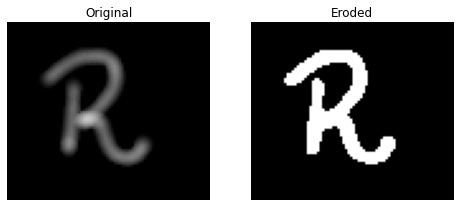

In [40]:
fig = plt.figure(figsize=(8, 10))
fig.add_subplot(1, 2, 1)
show_image(r_, 'Original')

fig.add_subplot(1, 2, 2)
show_image(r, 'Eroded')
plt.show()

In [41]:
world = plt.imread('images\\world_image_binary.jpg')
world_image = morphology.binary_dilation(world)

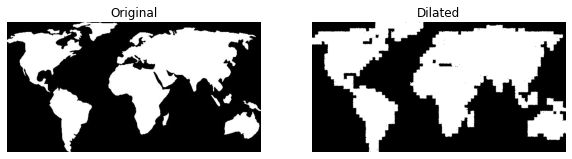

In [42]:
fig = plt.figure(figsize=(10, 12))
fig.add_subplot(1, 2, 1)
show_image(world, 'Original')

fig.add_subplot(1, 2, 2)
show_image(world_image, 'Dilated')
plt.show()

------------------------------------------------------------
------------------------------------------------------------

**Inpainting**
- Reconstructing lost parts of images

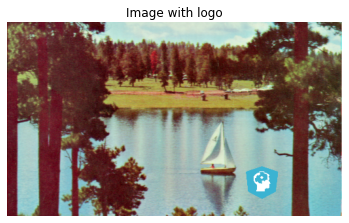

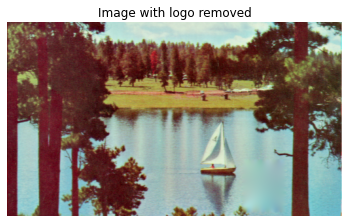

In [43]:
from skimage.restoration import inpaint 

# Removing logos
image_with_logo = plt.imread('images\\4.2.06_w_logo_2_2.png')
mask = np.zeros(image_with_logo.shape[:-1])

# Set the pixels where the logo is to 1
mask[210:290, 360:425] = 1

# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo, 
                                                mask, 
                                                multichannel=True)

# Show the original and logo removed images
show_image(image_with_logo, 'Image with logo')
plt.show()
show_image(image_logo_removed, 'Image with logo removed')

#### Noise

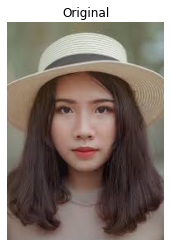

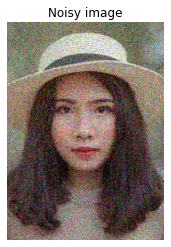

In [44]:
from skimage.util import random_noise

# First add some noise
# This type of noise is known as 'salt and pepper'
chinese_original = plt.imread('images\\chinese.jpg')
noisy_image = random_noise(chinese_original)
show_image(chinese_original, 'Original')
plt.show()
show_image(noisy_image, 'Noisy image')

In [45]:
# Reduce noise instead of adding them
# try total variation filter
from skimage.restoration import denoise_tv_chambolle

noisy_nature = plt.imread('images\\noise-noisy-nature.jpg')
denoised_img = denoise_tv_chambolle(noisy_nature, weight=0.1, multichannel=True)

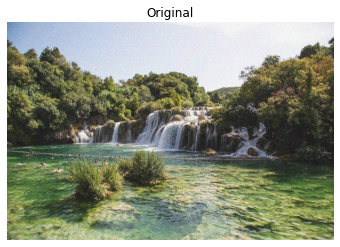

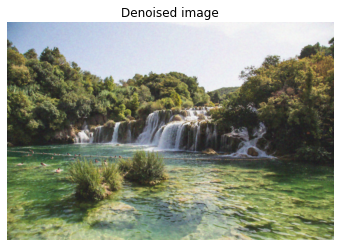

In [46]:
show_image(noisy_nature, 'Original')
plt.show()
show_image(denoised_img, 'Denoised image')

In [47]:
# try bilateral filter
from skimage.restoration import denoise_bilateral

denoised_img = denoise_bilateral(noisy_nature, multichannel=True)

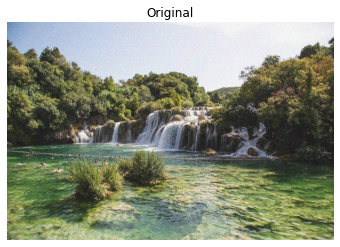

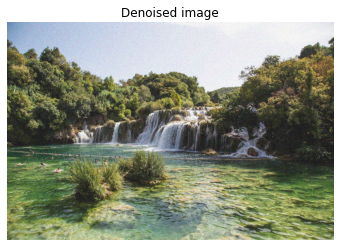

In [48]:
show_image(noisy_nature, 'Original')
plt.show()
show_image(denoised_img, 'Denoised image')

**Superpixels & segmentation**

In [49]:
# A superpixel is a group of connected pixels with similar colors or gray levels.
# superpixels has been applied to many computer vision tasks, like visual tracking and image classification

# Some advantages for using them are that You can compute features on more meaningful regions. 
# And that you can reduce an image from thousands of pixels down to some regions for subsequent algorithms, 
# so you have computational efficiency. 

In [50]:
"""Simple Linear Iterative Clustering or SLIC. It segments the image using a machine learning algorithm called 
K-Means clustering. It takes in all the pixel values of the image and tries to separate them into a predefined 
number of sub-regions."""

'Simple Linear Iterative Clustering or SLIC. It segments the image using a machine learning algorithm called \nK-Means clustering. It takes in all the pixel values of the image and tries to separate them into a predefined \nnumber of sub-regions.'

In [51]:
from skimage.segmentation import slic
from skimage.color import label2rgb

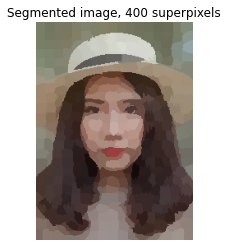

In [52]:
# Obtain the segmentation with 400 regions
segments = slic(chinese_original, n_segments = 400, start_label=1)

# Put segments on top of original image to compare
segmented_image = label2rgb(segments, chinese_original, kind='avg', bg_label =-1)

# Show the segmented image
show_image(segmented_image, "Segmented image, 400 superpixels")

**Finding contours**<br>
A contour is a closed shape of points or line segments, <br>representing the boundaries of these objects.

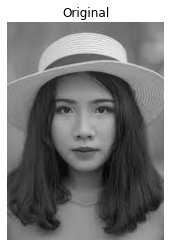

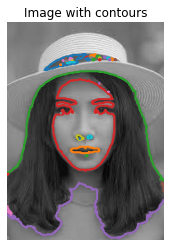

In [53]:
from skimage import measure

# hourse = data.astronaut()
gray_image = color.rgb2gray(chinese_original)
thresh = threshold_otsu(gray_image)
thresholded_img = gray_image > thresh

contours = measure.find_contours(thresholded_img, 0.9)

def show_image_contour(img, contours, title = 'Image with contours'):
    fig, ax = plt.subplots()
    ax.imshow(img, cmap=plt.cm.gray)
    plt.axis('off')
    plt.title(title)
    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
        
show_image(gray_image, 'Original')
show_image_contour(gray_image, contours)

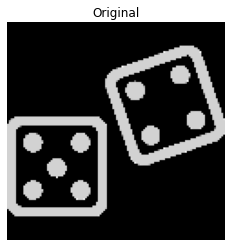

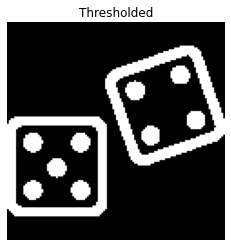

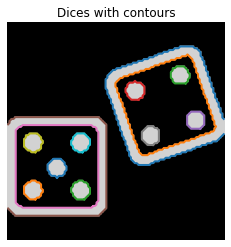

In [54]:
from skimage.color import rgb2gray

dices = plt.imread('images\dices.png')[:, :, :3]
dices_gray = rgb2gray(dices)
thresh = threshold_otsu(dices_gray)
thresholded__dice_img = dices_gray > thresh

contours_dice = measure.find_contours(thresholded__dice_img, 0.8)
show_image(dices_gray, 'Original')
plt.show()
show_image(thresholded__dice_img, 'Thresholded')
show_image_contour(dices_gray, contours_dice, 'Dices with contours')

**Finding the edges with Canny**

In [55]:
# canny edge detection
# produces higher accuracy detecting edges and less execution time compared with Sobel algorithm. 

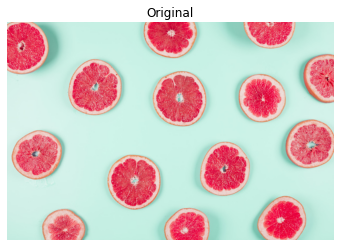

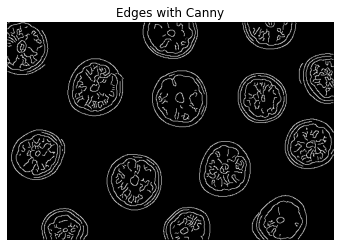

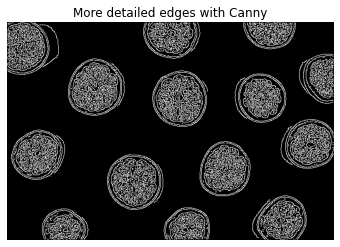

In [56]:
from skimage.feature import canny

toronjas = plt.imread('images\\toronjas.jpg')
show_image(toronjas, 'Original')
plt.show()

# to gray scale
gray_image = rgb2gray(toronjas)
# apply canny detector
canny_edges = canny(toronjas[:, :, 1], sigma=2)
show_image(canny_edges, 'Edges with Canny')
plt.show()

# canny detector with more detaild edeges
canny_edges = canny(toronjas[:, :, 1], sigma=0.5)
show_image(canny_edges, 'More detailed edges with Canny')

In [57]:
"""
     The lower the value of this sigma, the less of gaussian filter effect is applied on the image, 
     so it will spot more edges. On the other hand, if you set a higher value, 
     more noise will be removed and the result is going to be a less edgy image. 
     The default value of this parameter is 1. 
"""

'\n     The lower the value of this sigma, the less of gaussian filter effect is applied on the image, \n     so it will spot more edges. On the other hand, if you set a higher value, \n     more noise will be removed and the result is going to be a less edgy image. \n     The default value of this parameter is 1. \n'

**Right around the corner**

In [58]:
"""
    Corner detection is an approach used to extract certain types of features and infer the contents of an image. 
"""

'\n    Corner detection is an approach used to extract certain types of features and infer the contents of an image. \n'

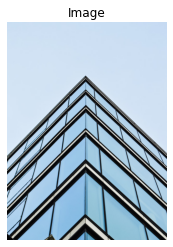

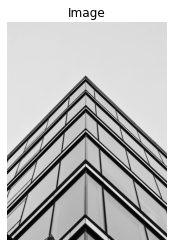

In [59]:
from skimage.feature import corner_harris

building_image = plt.imread('images\\corners_building_top.jpg')
building_image_gray = rgb2gray(building_image)
measure_image = corner_harris(building_image_gray)
show_image(building_image)
plt.show()
show_image(building_image_gray)

In [60]:
"""
    will return the coordinates of the peaks of the possible corners. Optionally, we can make sure these peak corners are separated by a minimum distance, in pixels, using the min_distance parameter. 
"""
def show_image_with_detected_corners(img, coords, title='Corners detected'):
    plt.imshow(img, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '.b', markersize=7)
    plt.axis('off')
    plt.show()

In [61]:
from skimage.feature import corner_harris, corner_peaks

coords = corner_peaks(corner_harris(building_image_gray), min_distance=5, threshold_rel=0.05)
print('A total of ', len(coords), ' corners were detected')

A total of  101  corners were detected


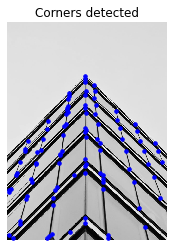

In [62]:
show_image_with_detected_corners(building_image_gray, coords)

**Face detection**

In [63]:
from skimage.feature import Cascade

face = plt.imread('images\\face_det9.jpg')

# load the trained file from the module.
tained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade.(the deetector we will use on our images)
# a scale factor, by which the searching window is multiplied in each step.
# a step ratio, in which 1 represents an exhaustive search and usually is slow. By setting this parameter to higher values the results will be worse but the computation will be much faster. Usually, values in the interval 1 to 1.5 give good results
# minimum and maximum window size are defined. These specify the interval for the search windows that are applied to the input image to detect the faces. 
detector = Cascade(tained_file)
detected = detector.detect_multi_scale(img=face, 
                                       scale_factor=1.2, 
                                       step_ratio = 1,
                                       min_size = (300, 300),
                                       max_size = (500, 500))

In [64]:
import matplotlib
def show_detected_face(result, detected, title='Face image'):
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')
    
    for patch in detected:
        img_desc.add_patch(
            matplotlib.patches.Rectangle(
             (patch['c'], patch['r']),
             patch['width'],
             patch['height'],
             fill=False, color='r', linewidth=2)
        )
    plt.show()    

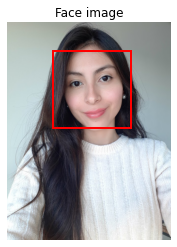

In [65]:
show_detected_face(face, detected)

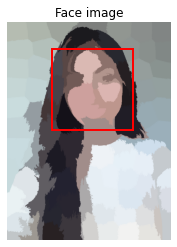

In [66]:
# Obtain the segmentation with default 100 regions
segments = slic(face, n_segments=100,  start_label=1)

# Obtain segmented image using label2rgb
segmented_image = label2rgb(segments,face, kind='avg', bg_label =-1)

# Detect the faces with multi scale method
detected = detector.detect_multi_scale(img=segmented_image, 
                                       scale_factor=1.2, 
                                       step_ratio=1, 
                                       min_size=(10, 10), max_size=(1000, 1000))

# Show the detected faces
show_detected_face(segmented_image, detected)

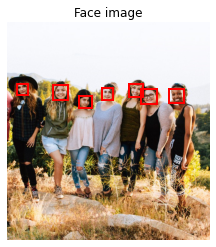

In [67]:
friends_image = plt.imread('images\\face_det_friends22.jpg')

# Detect faces with scale factor to 1.2 and step ratio to 1
detected = detector.detect_multi_scale(img=friends_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200, 200))
# Show the detected faces
show_detected_face(friends_image, detected)